In [66]:
# lets get these analogues going!

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy
import sklearn
from sklearn import cluster
from eofs.standard import Eof
from scipy.cluster.vq import vq
print('libraries loaded')
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

libraries loaded


In [71]:
# load in the cluster numbers for the validation period and the percentiles/median analogue

cluster_number = np.load('DJFM_cluster_assignment_2017_to_2020_with_30_clusters_v1.npy')
print(np.shape(cluster_number))

percentiles = [1,5,10,25,50,75,90,95,99]

field = 'speed10m'

median_analouge = np.load('median_analogue_' + field + '.npy')
percentiles_for_analogues = np.load('percentile_distribution_' + field + '.npy')

print(np.shape(median_analouge))
print(np.shape(percentiles_for_analogues))

(480,)
(30, 24)
(30, 9, 24)


In [72]:
# get the daily-mean of the field we care about

ERA5_data = np.load('ERA5_UK_' + field + '_hourly_data_1979_2020.npy')
#print(np.shape(ERA5_data))

ERA5_subset = np.concatenate((ERA5_data[38:42,0:90*24],ERA5_data[38:42,335*24:365*24]),axis=1)
ERA5_subset_reshape = np.reshape(ERA5_subset,(4,120,24))

ERA5_subset_timeseries = np.reshape(ERA5_subset_reshape,(4*120,24))
print(np.shape(ERA5_subset_timeseries))

ERA5_daily_means = np.mean(ERA5_subset_reshape,axis=2)
print(np.shape(ERA5_daily_means))


(480, 24)
(4, 120)


In [73]:
# now lets make the analogues for each day. 

analogues_median_data = np.zeros([len(cluster_number),24])
analogues_percentile_data = np.zeros([len(cluster_number),9,24])

for i in range(0,len(cluster_number)):
    analogues_median_data[i,:] = median_analouge[cluster_number[i],:]
    analogues_percentile_data[i,:,:] = percentiles_for_analogues[cluster_number[i],:,:]


(30, 9, 24)


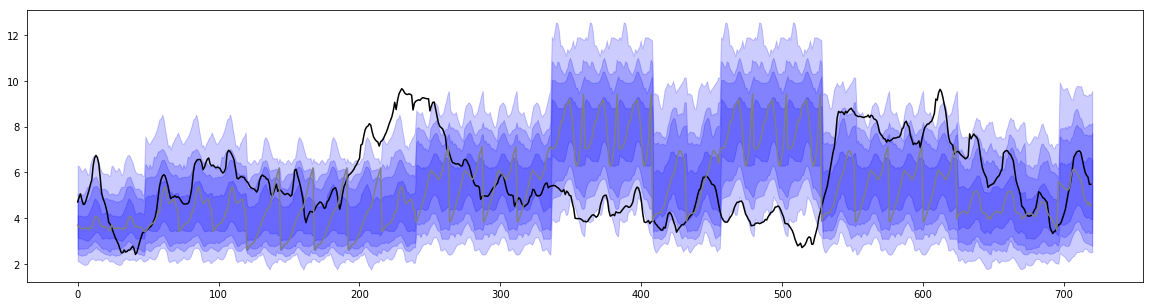

In [74]:
# extract the case study regions...

#beast from the East is 21st Feb 2018 --> 21st Mar 2018:

# 120 days in a set. Jan,feb,mar,dec.
# 2017 = 120 days, Jan 2018 = 31 days, feb 21st = 21 days... so 120 + 31 + 21: 120 + 31 + 30

bfte_cluster_nos = cluster_number[118+31+21:118+31+21+30]
bfte_medians = analogues_median_data[118+31+21:118+31+21+30,:]
bfte_percentiles = analogues_percentile_data[118+31+21:118+31+21+30,:,:]
print(np.shape(bfte_percentiles))
bfte_ERA5_val_data = ERA5_subset_timeseries[118+31+21:118+31+21+30,:]


fig = plt.figure(figsize=(20,5))

if field == 'speed10m':
    COL = 'blue'
elif field =='T2m':
    COL = 'red'
elif field =='ssrd':
    COL = 'gold'
    plt.ylim([0,600])
elif field == 'tp':
    COL = 'teal'
plt.fill_between(np.linspace(0,30*24,30*24),bfte_percentiles[:,3,:].flatten(),bfte_percentiles[:,5,:].flatten(),color=COL,alpha=0.2)
plt.fill_between(np.linspace(0,30*24,30*24),bfte_percentiles[:,2,:].flatten(),bfte_percentiles[:,6,:].flatten(),color=COL,alpha=0.2)
plt.fill_between(np.linspace(0,30*24,30*24),bfte_percentiles[:,1,:].flatten(),bfte_percentiles[:,7,:].flatten(),color=COL,alpha=0.2)
plt.fill_between(np.linspace(0,30*24,30*24),bfte_percentiles[:,0,:].flatten(),bfte_percentiles[:,8,:].flatten(),color=COL,alpha=0.2)

plt.plot(bfte_ERA5_val_data.flatten(),color='k')
plt.plot(bfte_medians.flatten(),color='grey')

#plt.text(np.linspace(0,30*24,30*24),np.linspace(-6,-6,30*24),bfte_cluster_nos)
